<a href="https://colab.research.google.com/github/Hirva-Bhagat/GooglePlaceReviewScraper/blob/master/KNN_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['UserName', 'Reviews', 'Rating', 'Date', 'Justine Soucy', '"THIS IS MY HAPPY PLACE. I\'ve been wanting to visit Hogwarts ever since it was announced that this theme park was in construction. ', 'The decor', ' ambiance', ' music', ' and details are all so great and well executed. ', 'The best thing ever for a fan …"', ' 5 stars ', '3 months ago', 'Nathan Estes', '"Extra ordinary place to hangout with kids with numerous rides such as roller coasters 🎢', ' pacific wheel and many more to enjoy late night. It also has many delicious food 🥘 stalls."', ' 5 stars ', '3 months ago', 'Keyla Chamay Pioquinto', '"The place is awesome ! Big fan of the whole franchise ', 'wish I could be there again some time soon ! 😝❤️"', ' 5 stars ', 'a month ago', 'Louis Nava', '"I\'m not enthusiastic about this place at all. It\'s super basic; I would give it a 3 star on the food but the price to quali

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: 'U' mode is deprecated
  


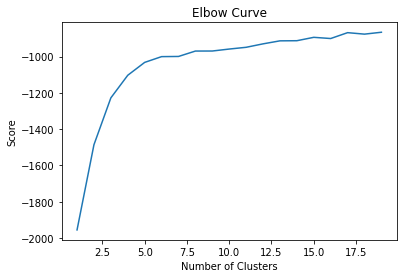

Performing LSA Dimension Reduction
done in 0.168847s

AFTER LSA matrix reduction: 
n_samples: 2750, n_features: 100
Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
done in 0.153s



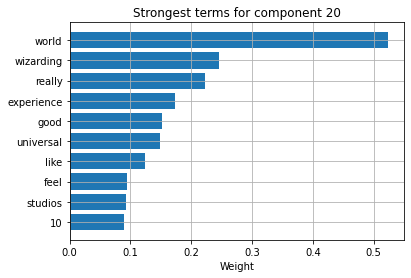

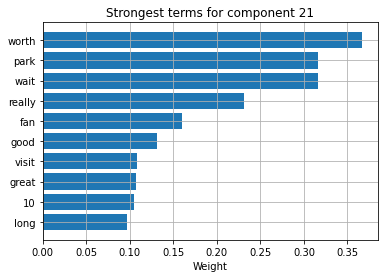

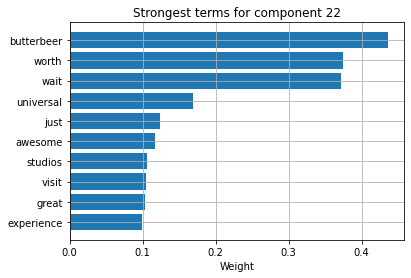

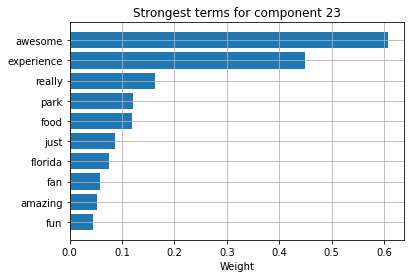

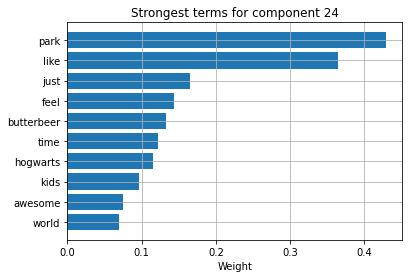

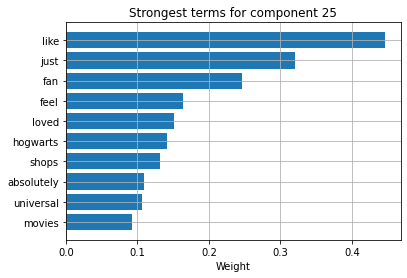

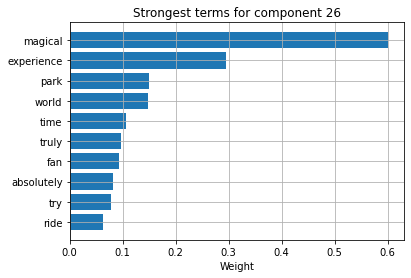

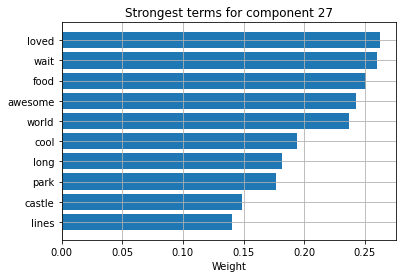

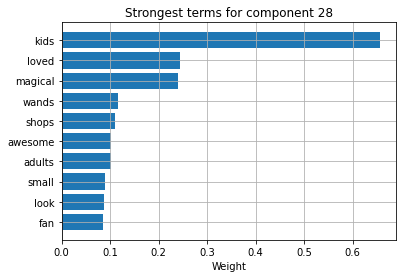

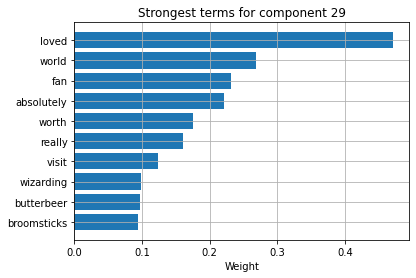

In [5]:
!pip install glove-python

# we need to pass splitted sentences to the model
import nltk,csv,numpy
nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize, pos_tag
sentences=[]
reader = csv.reader(open('/content/drive/My Drive/TWWReviews.csv', 'rU'), delimiter= ",",quotechar='|')
for line in reader:
    for field in line:
      sentences.append(field)
print(sentences)
lines=sentences

#importing the glove library
from glove import Corpus, Glove
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
from pylab import *
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn import cluster
import matplotlib.pyplot as plt

from time import time


print("Using TFIDF Vectorizer to produce Sparse Matrix of Features")
t0 = time()

vectorizer = TfidfVectorizer(max_df=0.5,
                                 min_df=5, stop_words='english')
X = vectorizer.fit_transform(lines)
print("done in %fs" % (time() - t0))
print("n_samples: %d, n_features: %d" % X.shape)
print("__________________________________________________________")
print()


# Creates Cosine Similarity Matrix
cosine_similarity = (X * X.T).A



## PLOTS ELBOW CURVE to find the "K" value
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()


# LSA dimension reduction
print("Performing LSA Dimension Reduction")
t0 = time()
svd = TruncatedSVD(100)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X = lsa.fit_transform(X)

print("done in %fs" % (time() - t0))

print()
print("AFTER LSA matrix reduction: ")
print("n_samples: %d, n_features: %d" % X.shape)


#K-MEANS CLUSTERING
km = KMeans(n_clusters=3, init='k-means++')
print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)
y_means = km.predict(X)

#PLOTS K-MEANS CLUSTERING

# plt.scatter(X[:,0],X[:,1], c=y_means, s=50, cmap='viridis')
# centers = km.cluster_centers_
# plt.scatter(centers[:,0],centers[:,1],c='black',s=300,alpha=0.5);
# plt.show()

print("done in %0.3fs" % (time() - t0))
print()



#VISUALIZES STRONGEST TERMS OF COMPONENTS (LSA)
feat_names = vectorizer.get_feature_names()

for compNum in range(20,30):
    comp = svd.components_[compNum]

    indeces = np.argsort(comp).tolist()
    indeces.reverse()
    terms = [feat_names[weightIndex] for weightIndex in indeces[0:10]]
    weights = [comp[weightIndex] for weightIndex in indeces[0:10]]

    terms.reverse()
    weights.reverse()
    positions = arange(10) + .5    # the bar centers on the y axis

    figure(compNum)
    barh(positions, weights, align='center')
    yticks(positions, terms)
    xlabel('Weight')
    title('Strongest terms for component %d' % (compNum))
    grid(True)
    show()